1. load dataset
2. clean data (missing values,duplicates,types)
3. treat outliers
4. univariate &bivariate and multi variate analysis
5. insights

In [5]:
import pandas as pd
import seaborn as sns

df=sns.load_dataset("penguins")


In [7]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
df.shape

(344, 7)

In [9]:
print(df["species"].unique())
print(df["island"].unique())
#print(df["bill_length_mm"].unique())
#print(df["bill_depth_mm"].unique())
#print(df["flipper_length_mm"].unique())
#print(df["body_mass_g"].unique())
print(df["sex"].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['Male' 'Female' nan]


#### sex,island and species are categorical data and they are nominal

In [25]:
print(df["sex"].isna().sum())

11


In [26]:
print(df["bill_length_mm"].isna().sum())
print(df["bill_depth_mm"].isna().sum())
print(df["flipper_length_mm"].isna().sum())

2
2
2


##### bill_length_mm,depth_mm,flipper length_mm are numerical continous data containing missing values

### Data Imputation

#### ->continous numerical data 

In [27]:
df["bill_length_mm"]=df["bill_length_mm"].fillna(df["bill_length_mm"].mean())
df["bill_depth_mm"]=df["bill_depth_mm"].fillna(df["bill_depth_mm"].mean())
df["flipper_length_mm"]=df["flipper_length_mm"].fillna(df["flipper_length_mm"].mean())
df["body_mass_g"].fillna(df["body_mass_g"].mean(),inplace=True)

C:\Users\HARSHAVARDHAN\AppData\Local\Temp\ipykernel_12400\2640138677.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["body_mass_g"].fillna(df["body_mass_g"].mean(),inplace=True)


In [28]:
print(df["bill_length_mm"].isna().sum())
print(df["bill_depth_mm"].isna().sum())
print(df["flipper_length_mm"].isna().sum())
print(df["body_mass_g"].isna().sum())

0
0
0
0


#### ->nominal categorical data

In [29]:
df["sex"]=df["sex"].fillna(df["sex"].mode()[0])
print(df["sex"].isna().sum())

0


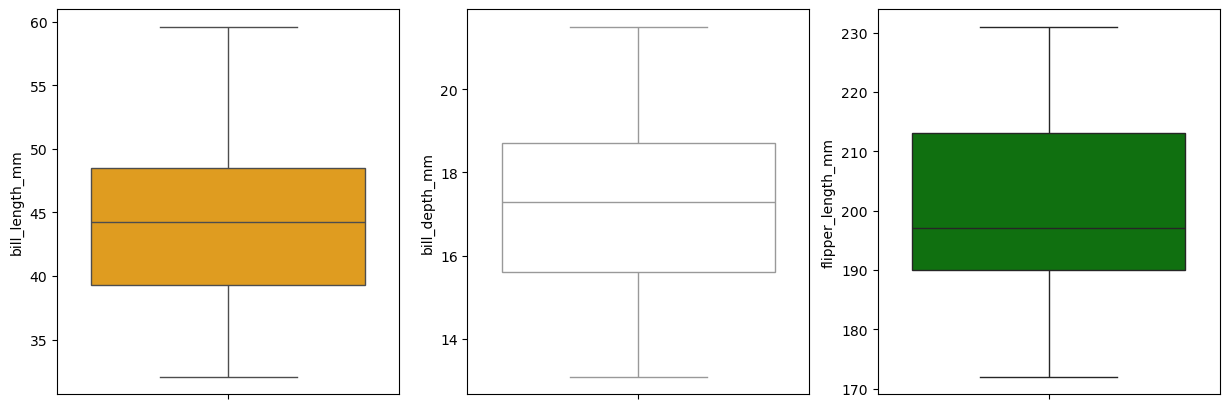

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(df["bill_length_mm"],color="orange")
plt.subplot(1,3,2)
sns.boxplot(df["bill_depth_mm"],color="white")
plt.subplot(1,3,3)
sns.boxplot(df["flipper_length_mm"],color="green")
plt.show()

### insights
-> no outliers by IQR rule

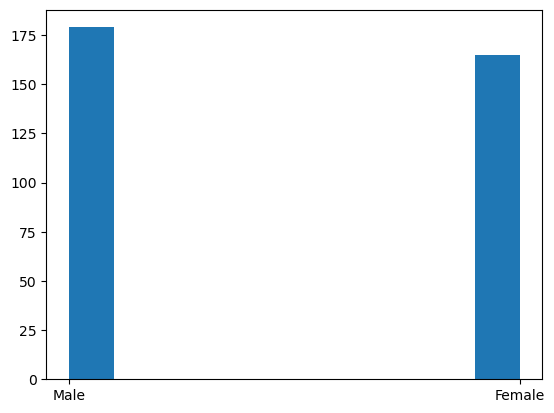

In [31]:
plt.hist(df["sex"])
plt.show()

### insights 
-> no of males is higher than the no of females

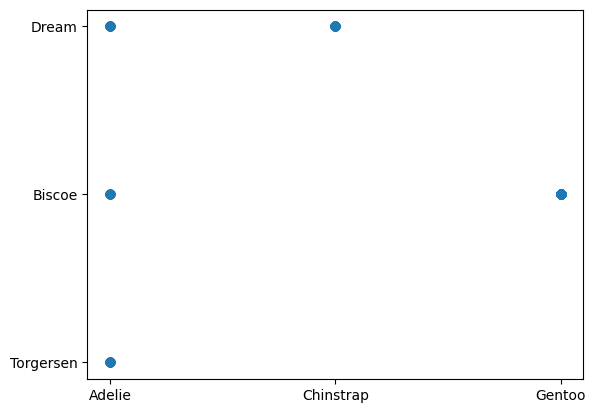

In [32]:
plt.scatter(x=df["species"],y=df["island"])
plt.show()

#### insights
1. the species adelie was scattered in all the three islands
2. the Dream,Biscoe island consists each of two species 
3. the Torgersen consists of only one kind of species 

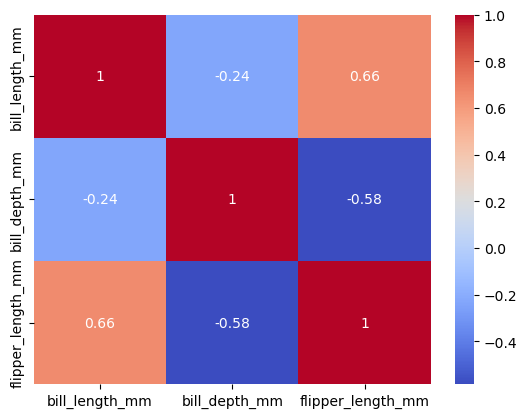

In [33]:
corr = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


#### insights
1. bill length and flipper length has positive correlation (Penguins with longer bills also tend to have longer flippers.)
2. bill depth and flipper length has moderate negative correlationn
3. bill_depth and bill_length also has is weak negative correlation

In [34]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in island or body_mass_g
anova_df = df.dropna(subset=["island", "body_mass_g"])

# Create groups for each island
group_biscoe = anova_df[anova_df["island"] == "Biscoe"]["body_mass_g"]
group_dream = anova_df[anova_df["island"] == "Dream"]["body_mass_g"]
group_torgensen = anova_df[anova_df["island"] == "Torgensen"]["body_mass_g"]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(group_biscoe, group_dream, group_torgensen)
print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: nan
p-value: nan


C:\Users\HARSHAVARDHAN\AppData\Local\Temp\ipykernel_12400\3868357320.py:14: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = f_oneway(group_biscoe, group_dream, group_torgensen)


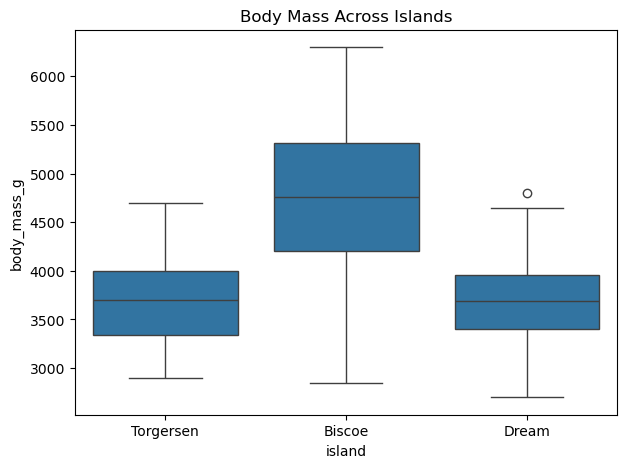

In [35]:
plt.figure(figsize=(7,5))
sns.boxplot(x="island", y="body_mass_g", data=anova_df)
plt.title("Body Mass Across Islands")
plt.show()


In [36]:
from scipy.stats import f_oneway

# Prepare groups
island_groups = df.dropna(subset=['body_mass_g'])  # ensure no missing body mass
group_biscoe = island_groups[island_groups['island'] == 'Biscoe']['body_mass_g']
group_dream = island_groups[island_groups['island'] == 'Dream']['body_mass_g']
group_torgensen = island_groups[island_groups['island'] == 'Torgensen']['body_mass_g']

# Perform ANOVA
f_stat, p_value = f_oneway(group_biscoe, group_dream, group_torgensen)

f_stat, p_value


C:\Users\HARSHAVARDHAN\AppData\Local\Temp\ipykernel_12400\3662821552.py:10: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = f_oneway(group_biscoe, group_dream, group_torgensen)


(np.float64(nan), np.float64(nan))

Text(0.5, 1.02, 'Pairplot of Penguin Features')

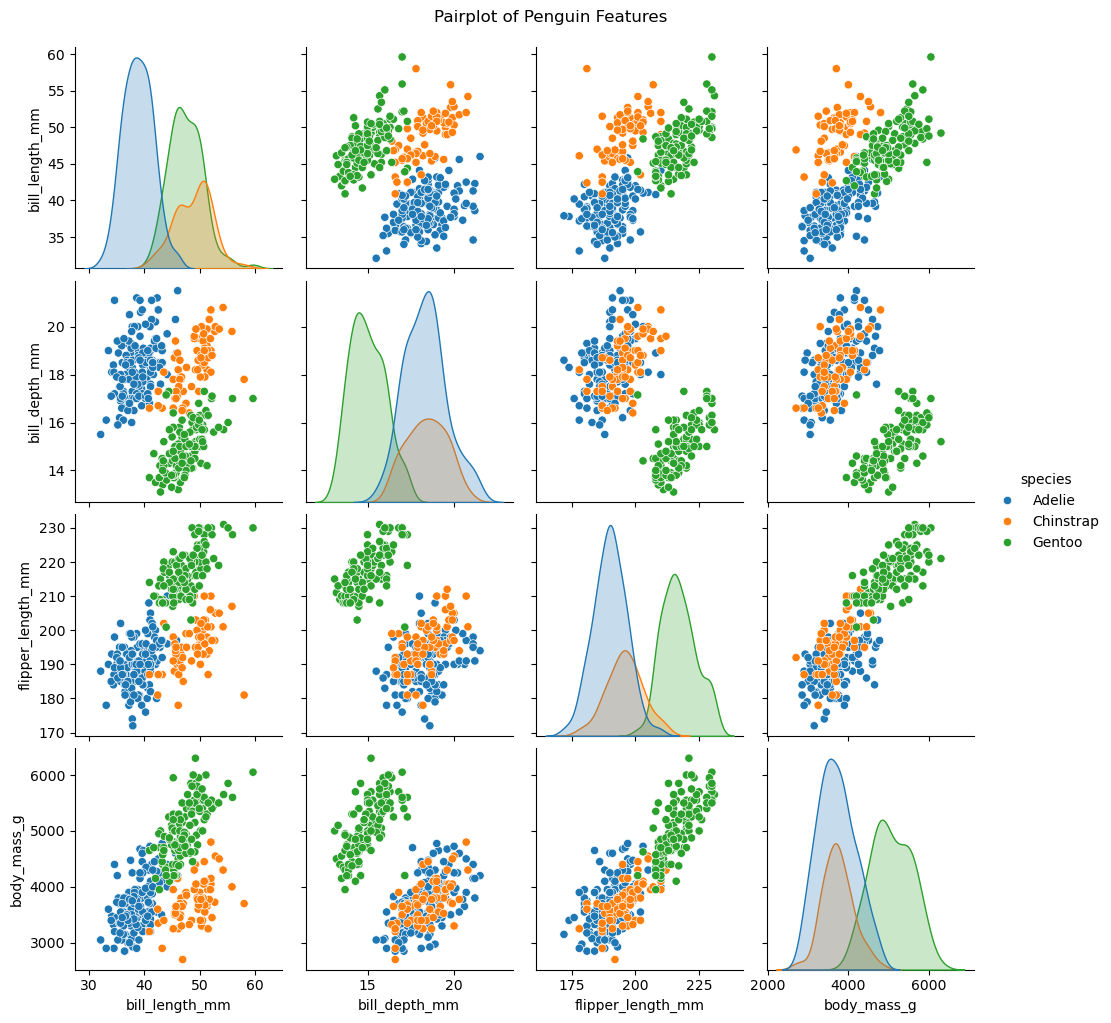

In [37]:
sns.pairplot(df, hue="species")
plt.suptitle("Pairplot of Penguin Features", y=1.02)


## One-Hot encoding

In [15]:
df2 = pd.get_dummies(df["species"], prefix='species')
df2 = df2.iloc[:, :-1]  
df = pd.concat([df, df2], axis=1).drop(['species'], axis=1)

In [16]:
df1=pd.get_dummies(df["island"],prefix="island",drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['island'],axis=1)

In [17]:
df3=pd.get_dummies(df["sex"],prefix="sex",drop_first=True)
df=pd.concat([df,df3],axis=1).drop(["sex"],axis=1)


In [18]:
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,island_Dream,island_Torgersen,sex_Male
0,39.10000,18.70000,181.000000,3750.000000,True,False,False,True,True
1,39.50000,17.40000,186.000000,3800.000000,True,False,False,True,False
2,40.30000,18.00000,195.000000,3250.000000,True,False,False,True,False
3,43.92193,17.15117,200.915205,4201.754386,True,False,False,True,True
4,36.70000,19.30000,193.000000,3450.000000,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,False,False,False,False,True
340,46.80000,14.30000,215.000000,4850.000000,False,False,False,False,False
341,50.40000,15.70000,222.000000,5750.000000,False,False,False,False,True
342,45.20000,14.80000,212.000000,5200.000000,False,False,False,False,False
